In [23]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [24]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
     shuffle=True,
    image_size=(256,256),
    batch_size=32
                                                    
                                            )

Found 2152 files belonging to 3 classes.


In [25]:
class_names=dataset.class_names
class_names

In [86]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [28]:
len(dataset)

68

In [35]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_ds=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_ds*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [36]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [87]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [40]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [41]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/256)
])

In [48]:
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

In [66]:
input_shape=(32,256,256,3)
n_classes=3
model=models.Sequential([
     resize_and_rescale,
     data_augmentaion,
     layers.Conv2D(32,(3,3),activation='relu', input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax'),
 ])
model.build(input_shape=input_shape)

In [67]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_71 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_71 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_72 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [68]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [69]:
history=model.fit(
train_ds,
    epochs=30,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 154s 3s/step - loss: 0.8999 - accuracy: 0.5065 - val_loss: 0.7980 - val_accuracy: 0.5833
Epoch 2/30
54/54 [==============================] - 119s 2s/step - loss: 0.7208 - accuracy: 0.6385 - val_loss: 0.4767 - val_accuracy: 0.7760
Epoch 3/30
54/54 [==============================] - 122s 2s/step - loss: 0.4358 - accuracy: 0.8081 - val_loss: 0.2933 - val_accuracy: 0.9062
Epoch 4/30
54/54 [==============================] - 121s 2s/step - loss: 0.3025 - accuracy: 0.8779 - val_loss: 0.2101 - val_accuracy: 0.9219
Epoch 5/30
54/54 [==============================] - 122s 2s/step - loss: 0.1892 - accuracy: 0.9237 - val_loss: 0.2026 - val_accuracy: 0.9115
Epoch 6/30
54/54 [==============================] - 122s 2s/step - loss: 0.1091 - accuracy: 0.9536 - val_loss: 0.1406 - val_accuracy: 0.9479
Epoch 7/30
54/54 [==============================] - 119s 2s/step - loss: 0.1411 - accuracy: 0.9507 - val_loss: 0.3228 - val_accuracy: 0.8802
Epoch 8/30
54

In [70]:
score=model.evaluate(test_ds)

8/8 [==============================] - 5s 600ms/step - loss: 0.0452 - accuracy: 0.9766


In [24]:
score

[0.1487211138010025, 0.95703125]

In [71]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

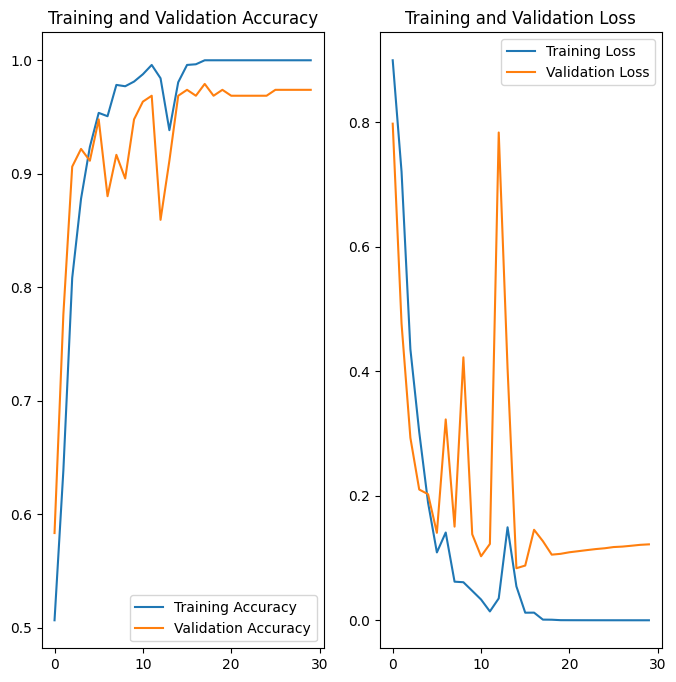

In [75]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(range(30),acc,label="Training Accuracy")
# plt.plot(range(30),val_acc,label="Validation Accuracy")
# plt.legend(loc='lower right')
# plt.title("Training and Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(range(30),loss,label="Training Loss")
# plt.plot(range(30),val_loss,label="Validation Loss")
# plt.legend(loc='upper right')
# plt.title("Training and Validation Loss")




first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 633ms/step
Predicted Label Potato___Late_blight
first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 637ms/step
Predicted Label Potato___Late_blight
first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 627ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 640ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 652ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 576ms/step
Predicted Label Potato___Late_blight


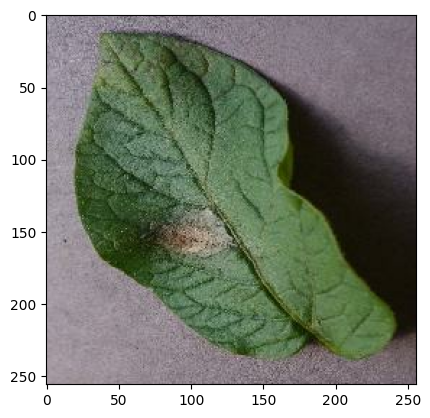

In [82]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)

    print("Predicted Label",class_names[np.argmax(batch_prediction[0])])

In [83]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [84]:
from tensorflow.keras.models import model_from_json

In [85]:
model_json = model.to_json()
with open("../models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("../models/model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../models/model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [86]:
json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../models/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
model.save("../models/model.h5")

In [84]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("../models/2",compile=True)

first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 803ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 613ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 1s 571ms/step
Predicted Label Potato___Early_blight
first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 565ms/step
Predicted Label Potato___Late_blight
first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 564ms/step
Predicted Label Potato___Late_blight
first image to predict
first image's actual label Potato___Late_blight
1/1 [==============================] - 1s 572ms/step
Predicted Label Potato___Late_blight
first image to predict
first

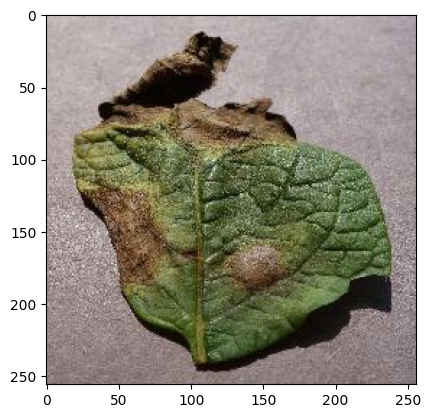

In [85]:
import numpy as np
for images_batch, labels_batch in test_ds.take(9):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label",class_names[first_label])
    
    batch_prediction=loaded_model.predict(images_batch)

    print("Predicted Label",class_names[np.argmax(batch_prediction[0])])